In [1]:
%run init.ipynb

# $Z$-, $X$-, $Y$- and Bell's basis

The computational basis ($z$-base) is denoted in bra-ket terms as $\vert0\rangle$ and $\vert1\rangle$. We can write the base of $x$ (here denoted by $\vert+\rangle$ and $\vert-\rangle$) in terms of that base via:
\begin{align}
\left\vert +\right\rangle  & =\frac{1}{\sqrt{2}}\left(  \left\vert
0\right\rangle +\left\vert 1\right\rangle \right)  \\
\left\vert -\right\rangle  & =\frac{1}{\sqrt{2}}\left(  \left\vert
0\right\rangle -\left\vert 1\right\rangle \right)
\end{align}
and the base of $y$ (here denoted by $\vert\oplus\rangle$ and $\vert\ominus\rangle$) as
\begin{align}
\left\vert \oplus\right\rangle  & =\frac{1}{\sqrt{2}}\left(  \left\vert
0\right\rangle +i\left\vert 1\right\rangle \right)  \\
\left\vert \ominus\right\rangle  & =\frac{1}{\sqrt{2}}\left(  \left\vert
0\right\rangle -i\left\vert 1\right\rangle \right)
\end{align}

Of course, we can write the base of $x$ in terms of the base of $y$ and vice versa, but we'll leave that to the code that follows.

## `mbk_xyBB(matrix, *bpos)`

What we have done here so far when we use `mbk` code is to write matrices in terms of the computational basis in bra-ket notation. So, we sent a state vector to the `mbk` function and it returned that state vector in bra-ket notation on the computational base.

Analogous to what `mbk` does, `mbk_xyBB` receives the state and writes the desired qubists in the base of $x, y,$ or, if it 
has two or more qubits, in the base of Bell.

The `matrix` parameter receives the state vector and `*bpos` are lists (or tuples) with the following order as e.g. `*bpos = ('base1', qubit_w, qubit_x, qubit_y), ('base2', qubit_z), ('BB', (qubit_w, qubit_{w-1}))`.

Note that you can send one or several positions that will have a certain `base`. As for the Bell base, it is necessary to send the two qubits that make up the base and they must already be positioned in the descending order that you want to write.

Let's start with some examples to make things more sense.

### One qubit

Consider the state $\vert\psi_0\rangle = \vert 0 \rangle$ which in our notation can be obtained in python through:

In [2]:
ψ_0 = pbk('0')
mbk(ψ_0)

Considering the state $\vert\psi_0\rangle$ above, we can write this computational basis state in the basis of $x$:

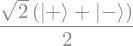

In [3]:
mysim(mbk_xyBB( ψ_0, ('x', 0)))

and in the basis of $y$:

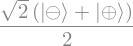

In [4]:
mysim(mbk_xyBB( ψ_0, ('y', 0)))

Now consider the state $\vert\psi_1\rangle = \vert 1 \rangle$ which in our notation can be obtained in python through:

In [5]:
ψ_1 = pbk('1')
mbk(ψ_1)

In the basis of $x$, we have:

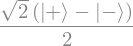

In [6]:
mysim(mbk_xyBB( ψ_1, ('x', 0)))

and in the basis of $y$:

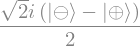

In [7]:
mysim(mbk_xyBB( ψ_1, ('y', 0)))

Consider the state $\vert\psi_{xp}\rangle = \vert+\rangle$ which in our notation can be obtained in python through:

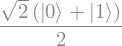

In [8]:
ψ_xp = pbk('+')
mysim(mbk(ψ_xp))

In the basis of $x$, we have:

In [9]:
mysim(mbk_xyBB( ψ_xp, ('x', 0)))

how it should be, and in the basis of $y$:

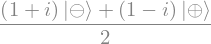

In [10]:
mysim(mbk_xyBB( ψ_xp, ('y', 0)))

That is, we can write the base of $\vert +\rangle$ in terms of the base of $y$.

In order not to get too repetitive, let's consider $\vert\psi_{ym}\rangle = \left|\ominus\right\rangle$  given by:

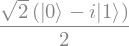

In [11]:
ψ_ym = pbk('l')
mysim(mbk(ψ_ym))

So in the basis of $y$:

In [12]:
mysim(mbk_xyBB( ψ_ym, ('y', 0)))

how it should be, and in the basis of $x$:

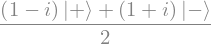

In [13]:
mysim(mbk_xyBB( ψ_ym, ('x', 0)))

Now we write the base $\left|\ominus\right\rangle$ in terms of the base $x$.

### Two or more qubits

Let's consider the state given by

In [14]:
ψ_AB = pbk('10')
mbk(ψ_AB)

Now we need to specify the qubit (or qubits) we want to write in a given basis. If it is in the base $x,y$, we can write only one of the qubits in that base, both in the same base, it is still possible to write one in each different base and so on. Here it is already possible to also write in the base of Bell. So let's show some examples:

1) Qubit 1 in base $x$:

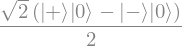

In [16]:
mysim(mbk_xyBB(ψ_AB, ('x', 1), split=1))

and the qubit 0 too

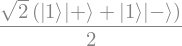

In [17]:
mysim(mbk_xyBB(ψ_AB, ('x', 0), split=1))

2) Qubit 1 in base $y$:

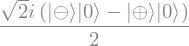

In [18]:
mysim(mbk_xyBB(ψ_AB, ('y', 1), split=1))

and the qubit 0 in the same base

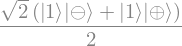

In [19]:
mysim(mbk_xyBB(ψ_AB, ('y', 0), split=1))

3) And now in the Bell basis:

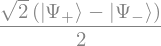

In [12]:
mysim(mbk_xyBB(ψ_AB, ('BB', (1,0))))

The programming used here is precisely to force the perception of the order in which the qubits are inserted to form the Bell base, so the two qubits that will compose the base and their order must be included.

### Bell basis

In [15]:
Φ_p = pbk('P')
mbk_xyBB(Φ_p, ('BB', (1,0)))

In [17]:
Φ_m = pbk('Q')
mbk_xyBB(Φ_m, ('BB', (1,0)))

In [18]:
Ψ_p = pbk('R')
mbk_xyBB(Ψ_p, ('BB', (1,0)))

In [19]:
Ψ_m = pbk('S')
mbk_xyBB(Ψ_m, ('BB', (1,0)))

### Computational base in terms of Bell Base

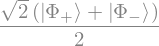

In [21]:
ψ_00 = pbk('00')
mysim(mbk_xyBB(ψ_00, ('BB', (1,0))))

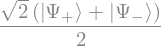

In [22]:
ψ_01 = pbk('01')
mysim(mbk_xyBB(ψ_01, ('BB', (1,0))))

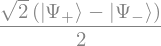

In [23]:
ψ_10 = pbk('10')
mysim(mbk_xyBB(ψ_10, ('BB', (1,0))))

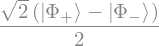

In [30]:
ψ_11 = pbk('11')
mysim(mbk_xyBB(ψ_11, ('BB', (1,0))))

### More examples

Below is a slightly more complex example. We can see that this state vector written in the computational base is quite extensive:

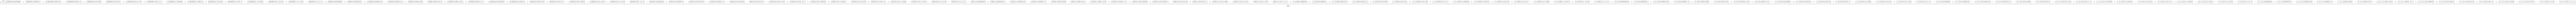

In [5]:
ψ = (1/sqrt(2))*(pbk('P+Rr-l1') + pbk('P-Rl+r0'))
mysim(mbk(ψ))

And using `mbk_xyBB`, we have

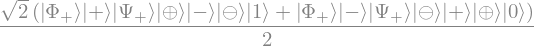

In [6]:
mysim(mbk_xyBB( ψ, ('y', 3, 1), ('BB', (8,7), (5,4)), ('x', 6, 2), split=1))

It is also possible to send in this format

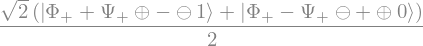

In [23]:
mysim(mbk_xyBB( ψ, ['y', 3, 1], ['BB', (8,7), [5,4]], ['x', 6, 2]))

Here is worth an observation: if you run this code, it is very possible that it will take a long time for this result to appear. This is due to the fact that we are considering 9 qubits, that is, we have a column matrix of $2^9=512$ rows. The `mbk_xyBB` function needs to rewrite the computational base in terms of the desired base in each qubit and then perform the new encoding that is presented to the user.

Another example, but with a slightly different configuration to show that the similar bases of a qubit stay in the same bracket and the Bell basis is always separated in a ket from the other elements of the state vector

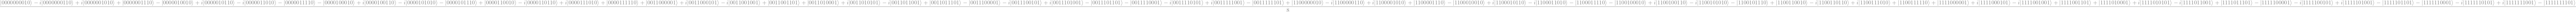

In [75]:
ψ = (1/sqrt(2))*(pbk('P00--rl10') + pbk('P11-+lr01'))
mysim(mbk(ψ))

And using `mbk_xyBB`, we have

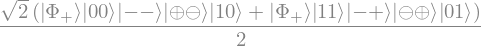

In [78]:
mysim(mbk_xyBB( ψ, ('BB', (9,8)), ('y', 3, 2), ('x', 4, 5)))

In [ ]:
Ke